In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import albumentations as A

In [2]:
from pathlib import Path

In [3]:
root = Path('../data/my_leaves/archive/')

In [5]:
real_image = cv2.imread(str(root / 'images/2021-09-26 17-12-33.jpg'))
real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)

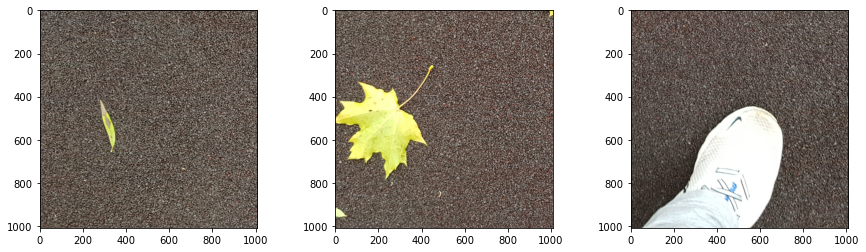

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].imshow(real_image[:1008,:1008,:])
ax[1].imshow(real_image[1008 : 1008 * 2, 1008 : 1008 * 2,:])
ax[2].imshow(real_image[1008 * 2 : 1008 * 3, 1008 * 2 : 1008 * 3,:])
plt.show()

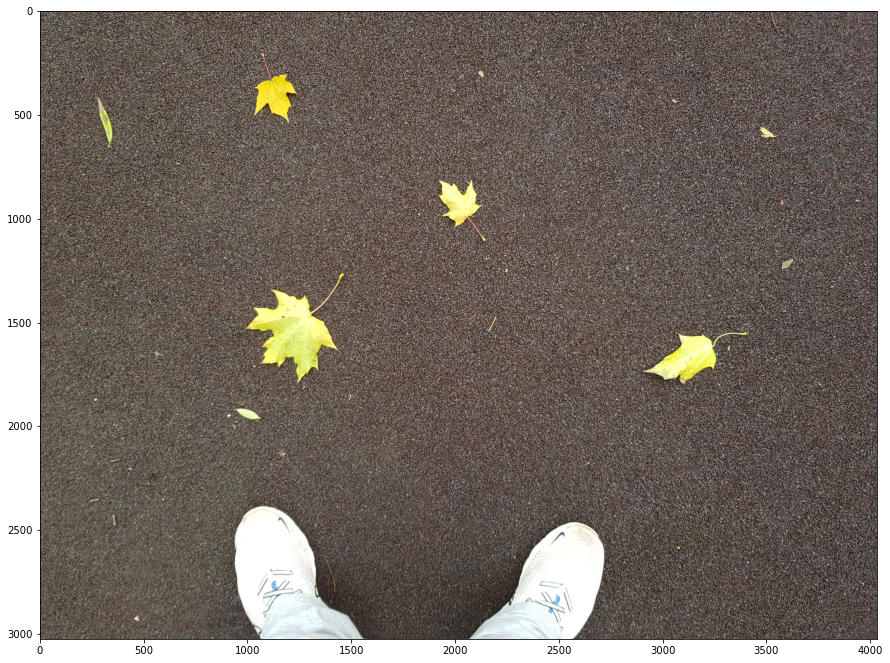

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
plt.imshow(real_image)
plt.show()

In [8]:
real_image.shape

(3024, 4032, 3)

Было решено кропать изображения размера 3024x4032 пикселей окнами размером 1008x1008 пикселей. Таким образом, одна фотка будет представлять собой 12 изображений. В первоначальноразмеченном датасете насчитывается 36 фотографий -> 432 окна для обучения.

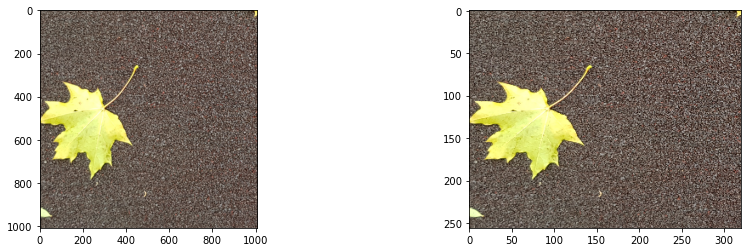

In [17]:
# как будет выглядеть Resize к 256x320 из 1008x1008
transform = A.Resize(256, 320)

fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].imshow(real_image[1008 : 1008 * 2, 1008 : 1008 * 2,:])
ax[1].imshow(transform(image=real_image[1008 : 1008 * 2, 1008 : 1008 * 2,:])['image'])
plt.show()

Как видно, качество не сильно страдает

Посмотрим как влияют различные преобразования на картинки - brightness, contrast, saturation, hue

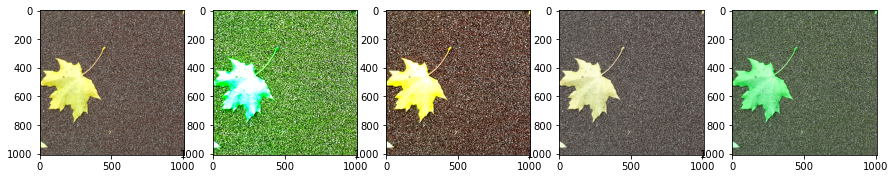

In [103]:
transform1 = A.ColorJitter(brightness=(1.5, 1.5), contrast=(2., 2.), saturation=(2., 2.), hue=(0.2,0.2), p=1)
transform2 = A.ColorJitter(brightness=0, contrast=(2.,2.), saturation=0, hue=0, p=1)
transform3 = A.ColorJitter(brightness=0, contrast=0, saturation=(0.5,0.5), hue=0, p=1)
transform4 = A.ColorJitter(brightness=0, contrast=0, saturation=0, hue=(0.2,0.2), p=1)

img = real_image[1008 : 1008 * 2, 1008 : 1008 * 2,:]

fig, ax = plt.subplots(1,5,figsize=(15,4))
ax[0].imshow(img)
ax[1].imshow(transform1(image=img)['image'])
ax[2].imshow(transform2(image=img)['image'])
ax[3].imshow(transform3(image=img)['image'])
ax[4].imshow(transform4(image=img)['image'])
plt.show()

In [104]:
A.__version__

'1.0.3'

Сервис supervisely выдает маску в виде одноканальной матрицы, в которой нулевые значения - область, не являющаяся меткой класса, а ненулевые значения - область, являющаяся меткой класса (в данном случае метка класса - 3)

In [9]:
mask_folder = 'segmented'
mask = cv2.imread(str(root / 'images/2021-09-26 17-12-33.jpg')\
                  .replace('images', mask_folder).replace('jpg', 'png'), 0)

In [22]:
mask.shape

(3024, 4032)

In [13]:
mask[1008 : 1008 * 2, 1008 : 1008 * 2]

array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

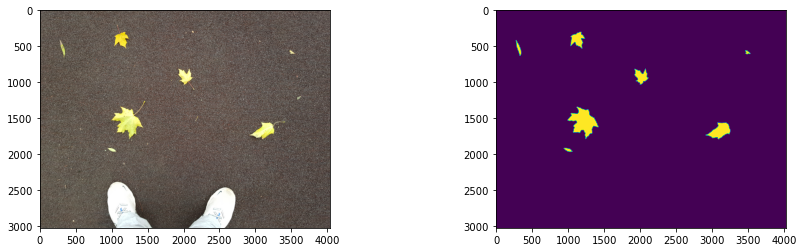

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].imshow(real_image)
ax[1].imshow(mask > 0)
plt.show()